# t-SNE visualization of CIFAR-100 models

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch
import sys
sys.path.append("/home/ssq/Desktop/phd/KD/mdistiller-master/")
from mdistiller.models import cifar_model_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# visualize t-SNE
def get_tsne(stu, mpath):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu
    cfg.DATASET.TYPE = 'cifar100'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cifar_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.96it/s]


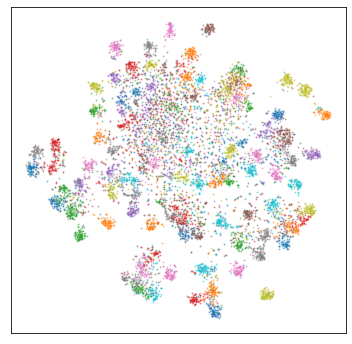

In [3]:
# KD baseline
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines_0/kd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

In [ ]:
# Teacher ResNet32x8
mpath = '/home/ssq/Desktop/phd/KD/mdistiller-master/download_ckpts/cifar_teachers/resnet32x4_vanilla/ckpt_epoch_240.pth'
get_tsne("resnet32x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


41it [00:17,  2.35it/s]

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.82it/s]


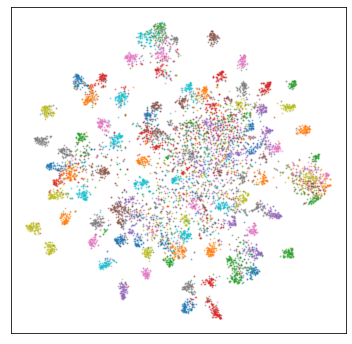

In [5]:
# DKD
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines_0/dkd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:15, 10.41it/s]


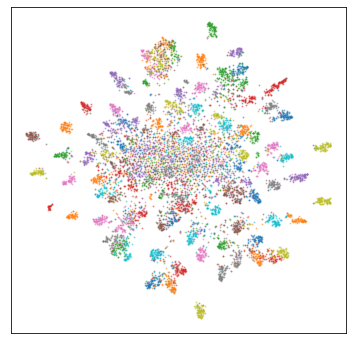

In [4]:
# KD baseline with ours
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines/kd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.73it/s]


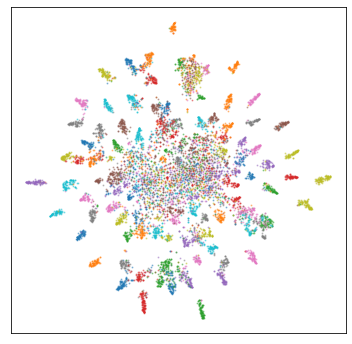

In [6]:
# DKD with ours
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines/dkd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.94it/s]


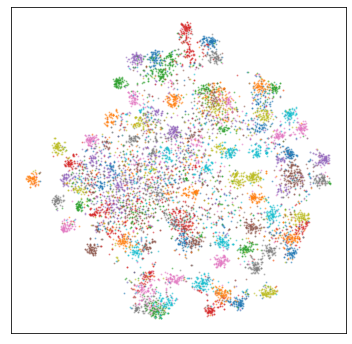

In [3]:
# CTKD baseline
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/ctkd/kd/resnet8x4_best.pth"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:10, 15.00it/s]


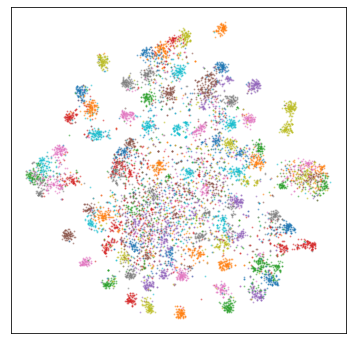

In [3]:
# CTKD with ours
mpath = "/home/ssq/Desktop/phd/KD/Multi-Level-Logit-Distillation-main/output/cifar100_baselines/kd_ours,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:09, 16.32it/s]


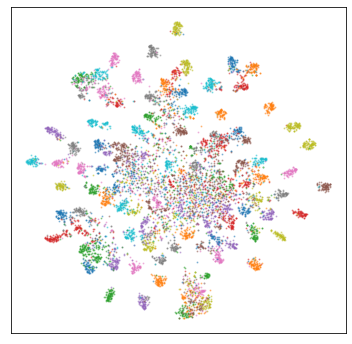

In [4]:
# CTKD baseline
mpath = "/home/ssq/Desktop/phd/KD/Multi-Level-Logit-Distillation-main/output/cifar100_baselines/kd_ours,res32x4,res8x4_1/student_best"
get_tsne("resnet8x4", mpath)